🔹 Dataset Shape: (545, 13)
🔹 Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

🔹 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  

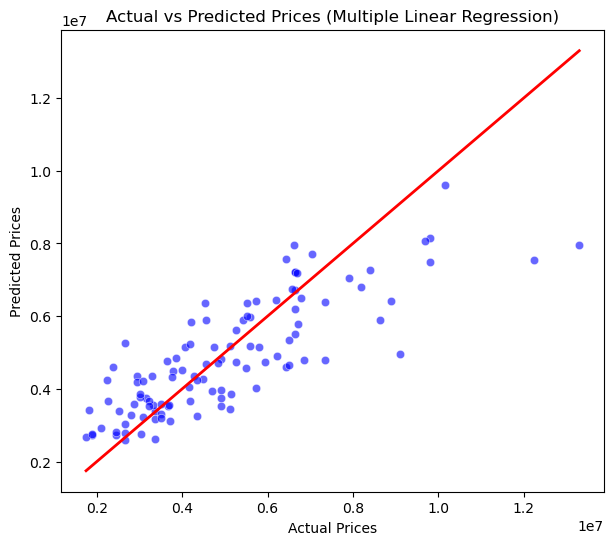

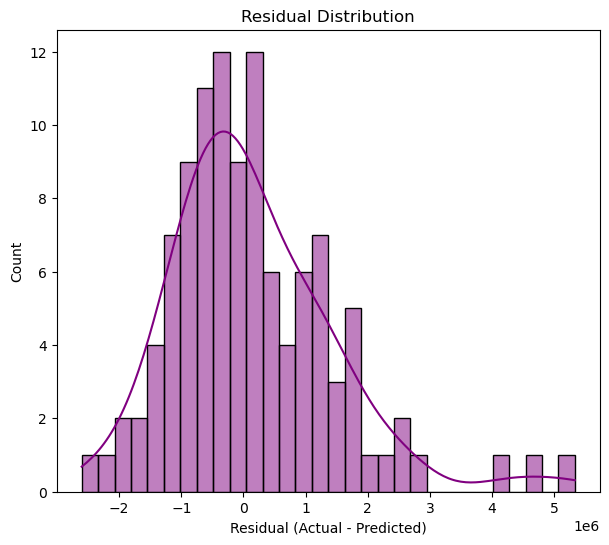

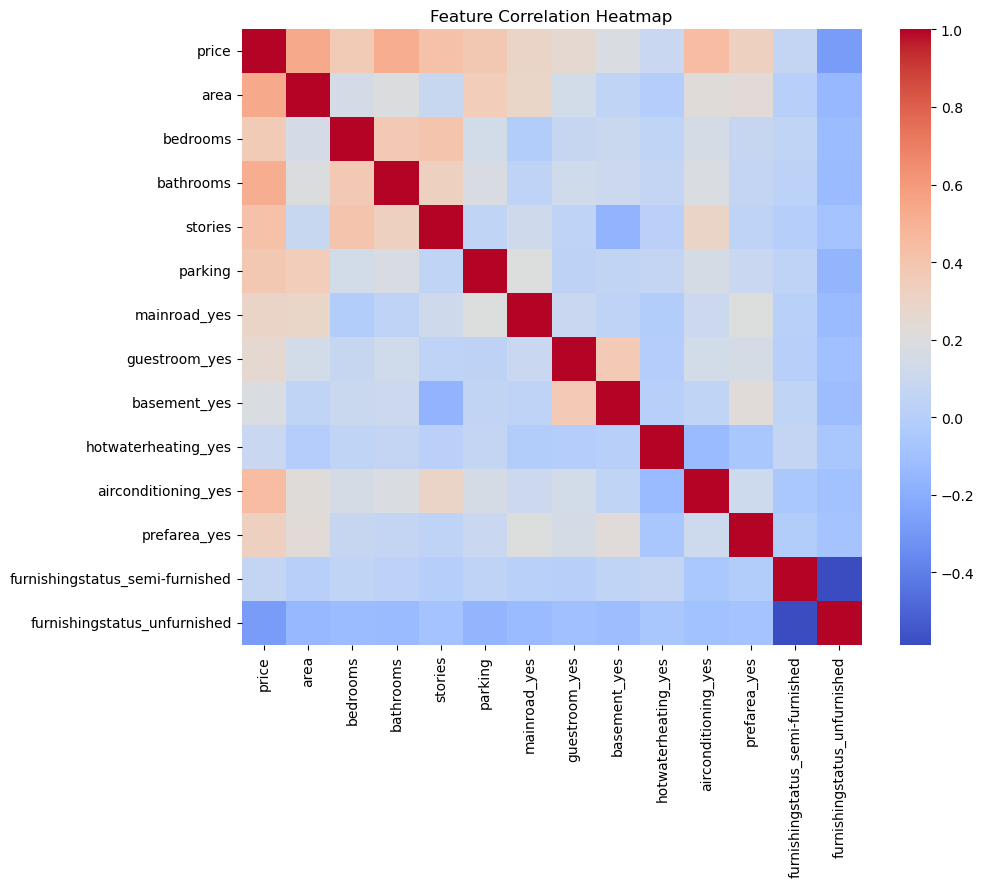

In [3]:
# ==========================================
# Multiple Linear Regression on Housing Dataset
# ==========================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [ ]:
# Load Dataset
df = pd.read_csv(r"D:\mydata\Elevate Labs\Housing.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\n Dataset Info:\n")
print(df.info())
print("\n Missing Values:\n", df.isnull().sum())
print("\n First 5 Rows:\n", df.head())



In [ ]:
# Preprocessing
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
y = df['price']
X = df.drop('price', axis=1)

# Check multicollinearity using VIF
vif = pd.DataFrame()
bool_cols = [col for col in X.columns if X[col].dtype == 'bool']
for col in bool_cols:
    X[col] = X[col].astype(float)
vif["Feature"] = X.columns


vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n Variance Inflation Factor (VIF):\n", vif)



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [ ]:
print("\n Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

#  Model Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n Coefficients:\n", coeff_df)
print(f"Intercept: {model.intercept_:.2f}")



In [ ]:
#  Visualize Actual vs Predicted
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

